In [18]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [19]:
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


In [20]:
# input map data
china_path = os.path.join(os.path.abspath('..'), 'data', 'china_map_data_without_island.json')
city_path = os.path.join(os.path.abspath('..'), 'data', 'city_map_data_with_ranking.json')
#city_ranking = os.path.join(os.path.abspath('..'), 'data', 'rawdata.csv')

china_map_data = gpd.read_file(china_path)
city_map_data = gpd.read_file(city_path)

In [21]:
city_map_data.head()

,id,name,childNum,Name_en,Ind-SAW,Ind-WP,Cri-SAW,Cri-WP,Ind-A-cz,Cri-A-cz,geometry
0,11,北京,NaN,Beijing,3,2,3,2,24.0,23,"POLYGON ((13064098.737193 4875745.494936933, 1..."
1,12,天津,NaN,Tianjin,27,25,18,19,39.0,39,"POLYGON ((13136764.49686383 4726004.755186192,..."
2,1301,石家庄市,19.0,Shijiazhuang,35,28,34,24,38.0,38,"POLYGON ((12671419.71335478 4660568.566759861,..."
3,1303,秦皇岛市,5.0,Qinhuangdao,4,7,4,6,29.0,28,"POLYGON ((13198539.76615908 4880087.039127382,..."
4,1306,保定市,23.0,Baoding,40,41,40,40,40.0,40,"POLYGON ((12752137.47612898 4775247.852292333,..."


In [22]:
city_map_data = city_map_data.drop(['Ind-SAW', 'Ind-WP', 'Cri-WP','Ind-A-cz', 'Cri-A-cz'], axis = 1)


In [23]:
rank_path = os.path.join(os.path.abspath('..'), 'results', 'outranking_matrix', 
                             'threshold_reference','threshold_reference.csv')

rank = pd.read_csv(rank_path)
rank.head()

,City,without_thres,thres_ref_phi23,thres_ref_phi12,thres_ref_phi13
0,Beijing,2,1,1.0,5
1,Tianjin,29,10,35.0,39
2,Shijiazhuang,33,13,30.0,38
3,Qinhuangdao,27,8,21.0,31
4,Baoding,36,19,32.5,36


In [27]:
city_map_data_with_rank = pd.concat([city_map_data, rank], axis = 1)
city_map_data_with_rank = city_map_data_with_rank.drop(['City'], axis = 1)
city_map_data_with_rank.head()

,id,name,childNum,Name_en,Cri-SAW,geometry,without_thres,thres_ref_phi23,thres_ref_phi12,thres_ref_phi13
0,11,北京,NaN,Beijing,3,"POLYGON ((13064098.737193 4875745.494936933, 1...",2,1,1.0,5
1,12,天津,NaN,Tianjin,18,"POLYGON ((13136764.49686383 4726004.755186192,...",29,10,35.0,39
2,1301,石家庄市,19.0,Shijiazhuang,34,"POLYGON ((12671419.71335478 4660568.566759861,...",33,13,30.0,38
3,1303,秦皇岛市,5.0,Qinhuangdao,4,"POLYGON ((13198539.76615908 4880087.039127382,...",27,8,21.0,31
4,1306,保定市,23.0,Baoding,40,"POLYGON ((12752137.47612898 4775247.852292333,...",36,19,32.5,36


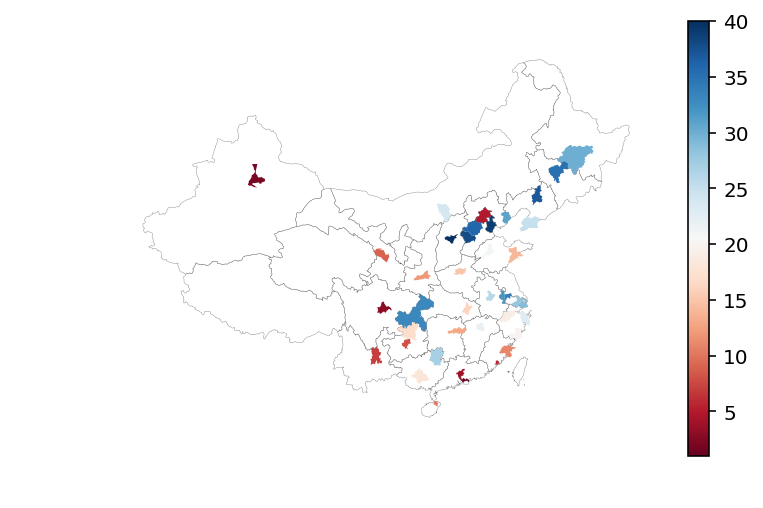

In [32]:
# Managing projection

china_map_data = china_map_data.to_crs(epsg = 3395)

# plot China map
#base = china_map_data.plot(color = 'white', edgecolor = 'black', linewidth = 0.2, alpha = 0.5)
#plt.axis('off')

city_map_data_with_rank = city_map_data_with_rank.to_crs(china_map_data.crs)

fig, ax = plt.subplots()

ax.set_aspect('equal')


china_map_data.plot(ax = ax, color = 'white', edgecolor = 'black', linewidth = 0.2, alpha = 0.5)

#city_map_data.plot(ax = ax, column = 'Ind-A-cz',cmap = 'RdBu', categorical=True, legend = True)
# city_map_data.plot(ax = ax, column = 'nest_weight', cmap = 'RdBu')

#city_map_data.plot(ax = ax, column = 'nest_weight', cmap = 'RdBu',legend = True, location = 2)
city_map_data_with_rank.plot(ax = ax, column = 'thres_ref_phi13', cmap = 'RdBu', legend = True)

ax.axis('off')

# leg = ax.get_legend()
# leg.set_bbox_to_anchor((0., 0.35, 0.4, 0.2))
# leg.prop = {'size': 8}

fig.savefig('../results/outranking_matrix/threshold_reference/legend.pdf')

#plt.show()